In [52]:
%load_ext autoreload
%autoreload 2
import sys
extra_path = "/Users/iraklis/Public/iraklis7_linrg"
if extra_path not in sys.path:
    sys.path.append(extra_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from pathlib import Path
import pandas as pd
from sklearn.linear_model import SGDRegressor
import iraklis7_linrg.config as config
import iraklis7_linrg.plots as plots
import iraklis7_linrg.modeling.train as train
import iraklis7_linrg.modeling.predict as predict

### Create and fit the regression model

In [54]:
features_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_FEATURES
labels_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_LABELS
predictions_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PREDICTIONS
model_path: Path = config.MODELS_DIR / config.DATASET_MODEL
plot_path: Path = config.FIGURES_DIR / config.TRAINING_PLOT

features = pd.DataFrame(config.read_data(features_path))
if features is None:
    raise ValueError("read_data failed - data is None")
labels = pd.DataFrame(config.read_data(labels_path))
if labels is None:
    raise ValueError("read_data failed - data is None")

In [55]:
X_features = ['Εμβαδόν','Όροφος Ρετιρέ', 'Κατάσταση', 'Ασανσέρ από 3ο']
features = features[X_features]
features.head()

,Εμβαδόν,Όροφος Ρετιρέ,Κατάσταση,Ασανσέρ από 3ο
0,0.479710,-0.402015,1.247554,-1.343457
1,-0.782906,-0.402015,-0.831703,-1.343457
2,0.576834,2.487469,-0.831703,0.744348
3,-0.151598,-0.402015,1.247554,0.744348
4,-0.734344,-0.402015,-0.831703,0.744348


In [56]:
sgdr = SGDRegressor(max_iter=1000)
train.fit_model(sgdr, features, labels)

2026-01-20 22:05:08.729 | INFO     | iraklis7_linrg.modeling.train:fit_model:15 - SGDRegressor()
2026-01-20 22:05:08.729 | INFO     | iraklis7_linrg.modeling.train:fit_model:16 - number of iterations completed: 67, number of weight updates: 7706.0


/Users/iraklis/Public/iraklis7_linrg/lib/python3.14/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### View parameters
Note, the parameters are associated with the *normalized* input data.

In [57]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:  w: {w_norm}, b:{b_norm}")

model parameters:  w: [ 78.23 -11.39  20.67  32.83], b:[325.87]


### Make predictions
Predict the targets of the training data.

In [ ]:
# make a prediction using sgdr.predict()
predictions = sgdr.predict(features)
config.write_data(predictions_path,pd.DataFrame(predictions, columns=['ΕκΤιμή']))

print(f"Prediction on training set:\n{predictions[:4]}" )
print(f"Target values \n{labels[:4]}")

Prediction on training set:
[349.66 207.91 349.91 368.81]
Target values 
    Τιμή
0  245.0
1  171.0
2  400.0
3  370.0


### Score model's performance

In [ ]:
print("SCORE: ", sgdr.score(features, labels))
predict.score_model(labels, predictions)

SCORE:  0.49328080705203314
2026-01-20 21:00:08.790 | INFO     | iraklis7_linrg.modeling.train:score_model:21 - MAE: 69.01614483812214
2026-01-20 21:00:08.791 | INFO     | iraklis7_linrg.modeling.train:score_model:22 - MSE: 9034.296682645554
2026-01-20 21:00:08.792 | INFO     | iraklis7_linrg.modeling.train:score_model:23 - MSLE: 0.0696168349666438
2026-01-20 21:00:08.792 | INFO     | iraklis7_linrg.modeling.train:score_model:24 - MAPE: 0.21815758292327486
2026-01-20 21:00:08.793 | INFO     | iraklis7_linrg.modeling.train:score_model:25 - MEAE: 50.479045142966584
2026-01-20 21:00:08.793 | INFO     | iraklis7_linrg.modeling.train:score_model:26 - MAXE: 427.52414691340266
2026-01-20 21:00:08.794 | INFO     | iraklis7_linrg.modeling.train:score_model:27 - EVS: 0.4932811798127902


### Plot Results
Let's plot the predictions versus the target values.

['Εμβαδόν', 'Όροφος Ρετιρέ', 'Κατάσταση', 'Ασανσέρ από 3ο']


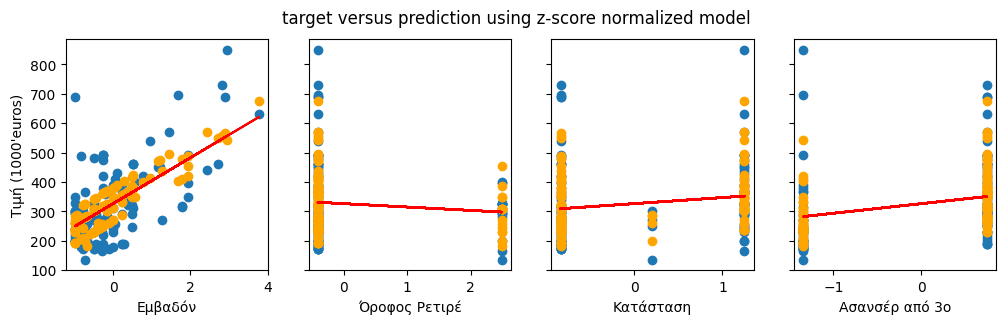

In [ ]:
featuresX = features.to_numpy()
plots.gen(list(features), featuresX, labels, predictions, w_norm, b_norm, plot_path, True)

### Save the trained model

In [48]:
train.save_model(sgdr, model_path)

2026-01-20 21:00:09.138 | DEBUG    | iraklis7_linrg.modeling.train:save_model:32 - Model saved to: /Users/iraklis/Public/iraklis7_linrg/models/listings_data_model.joblib
